In [1]:
%run ../../base-notebook.ipynb

--2023-05-15 22:19:59--  https://raw.githubusercontent.com/sodeso-nl/ml-utilities/main/ml_util.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15836 (15K) [text/plain]
Saving to: ‘ml_util.py’

ml_util.py          100%[===================>]  15.46K  --.-KB/s    in 0s      

2023-05-15 22:19:59 (33.8 MB/s) - ‘ml_util.py’ saved [15836/15836]

--2023-05-15 22:19:59--  https://raw.githubusercontent.com/sodeso-nl/ml-utilities/main/ml_io.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1504 (1.5K) [text/plain]
Saving to: ‘ml_io.py’


In [1]:
import sys

sys.path.append("../../ext")

import ext.ml_callback as mlc
import ext.ml_plot as mlp
import ext.ml_util as mlu

import tensorflow as tf

from keras import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.losses import binary_crossentropy
from sklearn import datasets

ModuleNotFoundError: No module named 'ml_layer'

# Create a moon dataset and visualize the data

In [4]:
X, y = datasets.make_moons(500, shuffle=True, random_state=42)

X[:10], y[:10]

NameError: name 'datasets' is not defined

## Visualize the data

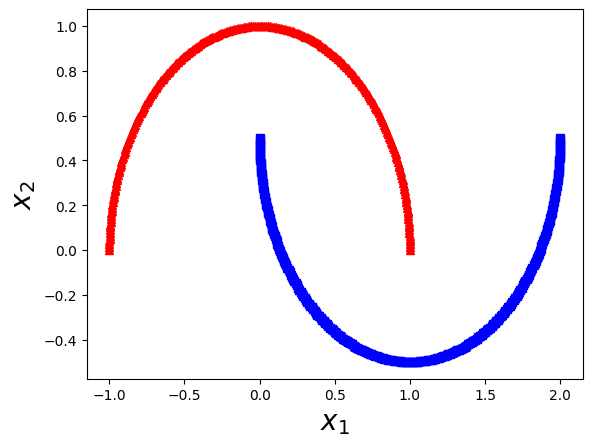

In [5]:
# Let's visualize the data so it easier to see what we're dealing with.
mlp.plot_xy_data_with_label(x=X, y=y)

## Pre-process data

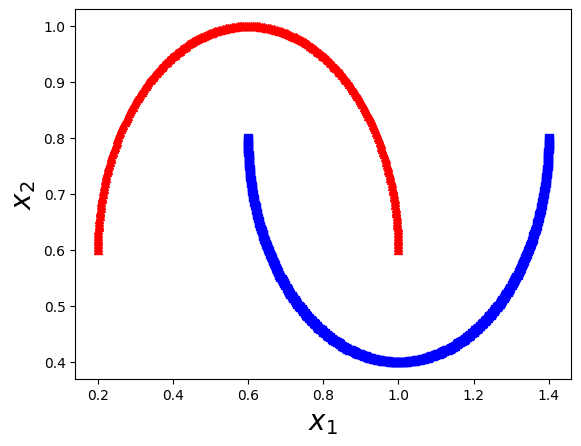

In [6]:
# The data represents two half moons intertwined, the data appears to be ranging from -0.4 to 1 on the Y axis and -1.0 to 2.0 on the X axis. models prefer data to be between 0 and 1. So we need to normalize our data.

X_norm = mlu.normalize_xy_data(X=X)

# Let's plot the data again to see if the normalization did work out.

mlp.plot_xy_data_with_label(x=X_norm, y=y)

## Create training / test data sets

In [7]:
X_train, X_test, y_train, y_test = mlu.split_train_test_data(X, y)

X_train[:5], y_train[:5], X_test[:5], y_test[:5]

(array([[-0.51088642,  0.85964822],
        [ 1.94667636,  0.17781393],
        [ 1.41019154, -0.4119994 ],
        [ 0.8498262 ,  0.52706302],
        [ 0.90407356,  0.42737687]]),
 array([0, 1, 1, 0, 0]),
 array([[ 0.13714602, -0.00545327],
        [ 0.12466762,  0.01647831],
        [ 0.11274655,  0.03871775],
        [ 0.78099493, -0.47572372],
        [ 0.48911358, -0.35964822]]),
 array([1, 1, 1, 1, 1]))

## Create model_1 as a baseline

In [8]:
tf.random.set_seed(42)

model_1 = Sequential([
    Dense(10, activation="relu", input_shape=[2]),
    Dense(10, activation="relu"),
    Dense(1, activation="sigmoid")
])

model_1.compile(loss=binary_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(X_train,
                        y_train,
                        epochs=50,
                        validation_data=(X_test, y_test))

Metal device set to: Apple M1 Max
Epoch 1/50


2023-04-20 10:21:48.963920: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


13/13 [==============================] - 1s 35ms/step - loss: 0.6487 - accuracy: 0.7050 - val_loss: 0.6351 - val_accuracy: 0.7400
Epoch 2/50
13/13 [==============================] - 0s 11ms/step - loss: 0.6102 - accuracy: 0.8450 - val_loss: 0.5978 - val_accuracy: 0.8000
Epoch 3/50
13/13 [==============================] - 0s 11ms/step - loss: 0.5749 - accuracy: 0.8600 - val_loss: 0.5620 - val_accuracy: 0.8400
Epoch 4/50
13/13 [==============================] - 0s 11ms/step - loss: 0.5407 - accuracy: 0.8675 - val_loss: 0.5294 - val_accuracy: 0.8400
Epoch 5/50
13/13 [==============================] - 0s 11ms/step - loss: 0.5088 - accuracy: 0.8725 - val_loss: 0.4981 - val_accuracy: 0.8500
Epoch 6/50
13/13 [==============================] - 0s 10ms/step - loss: 0.4774 - accuracy: 0.8775 - val_loss: 0.4679 - val_accuracy: 0.8500
Epoch 7/50
13/13 [==============================] - 0s 10ms/step - loss: 0.4479 - accuracy: 0.8850 - val_loss: 0.4390 - val_accuracy: 0.8600
Epoch 8/50
13/13 [======

## Plot history of model_1

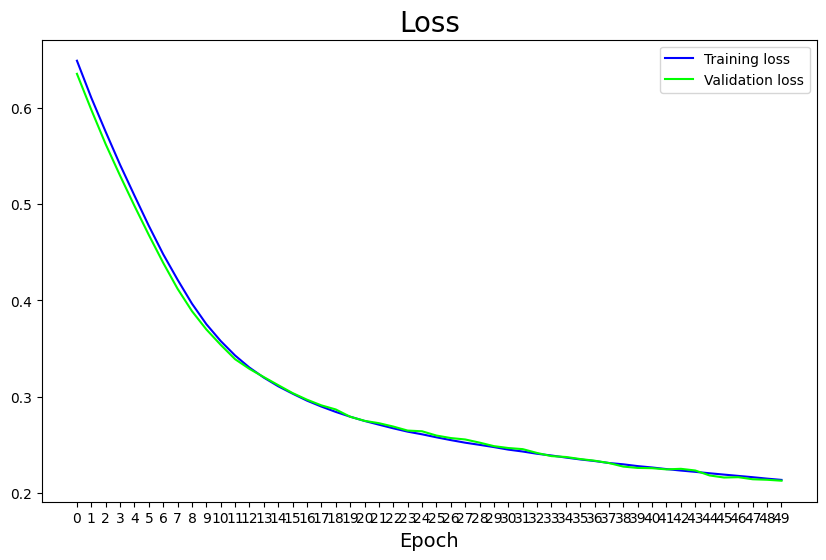

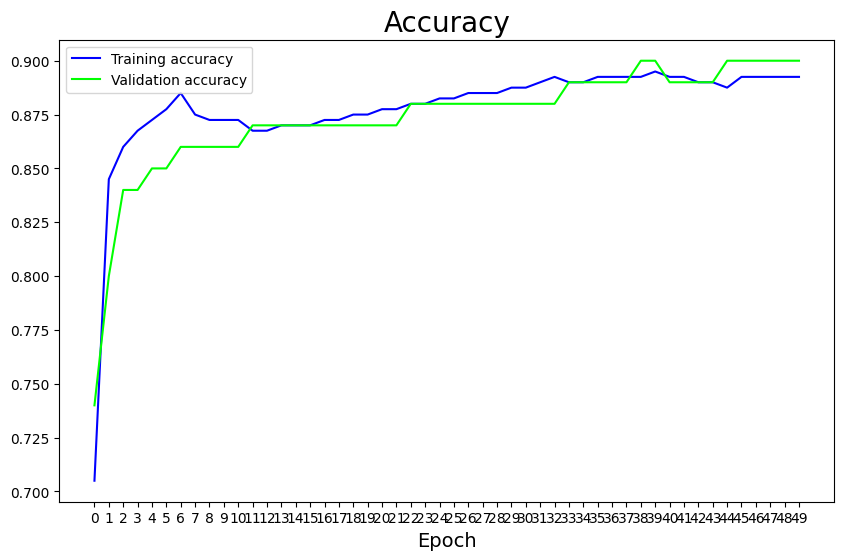

In [9]:
mlp.plot_history(history=history_1)

## Create model_2 to find a more optimal learning rate

In [10]:
tf.random.set_seed(42)

initial_lr = 0.001
epochs = 35

model_2 = tf.keras.models.clone_model(model_1)

model_2.compile(loss=binary_crossentropy,
                optimizer=Adam(learning_rate=initial_lr),
                metrics=["accuracy"])

lr_scheduler = mlc.create_learning_rate_scheduler_callback(learning_rate_start=initial_lr, epochs=epochs)

history_2 = model_2.fit(X_train, y_train,
            epochs=epochs,
            validation_data=(X_test, y_test),
            callbacks=[lr_scheduler])

Epoch 1/50
13/13 [==============================] - 1s 26ms/step - loss: 0.6983 - accuracy: 0.6650 - val_loss: 0.6643 - val_accuracy: 0.7400 - lr: 0.0010
Epoch 2/50
13/13 [==============================] - 0s 11ms/step - loss: 0.6693 - accuracy: 0.6850 - val_loss: 0.6367 - val_accuracy: 0.6900 - lr: 0.0011
Epoch 3/50
13/13 [==============================] - 0s 11ms/step - loss: 0.6405 - accuracy: 0.6725 - val_loss: 0.6071 - val_accuracy: 0.7100 - lr: 0.0012
Epoch 4/50
13/13 [==============================] - 0s 12ms/step - loss: 0.6111 - accuracy: 0.7025 - val_loss: 0.5774 - val_accuracy: 0.7600 - lr: 0.0013
Epoch 5/50
13/13 [==============================] - 0s 11ms/step - loss: 0.5791 - accuracy: 0.7425 - val_loss: 0.5443 - val_accuracy: 0.7800 - lr: 0.0015
Epoch 6/50
13/13 [==============================] - 0s 11ms/step - loss: 0.5431 - accuracy: 0.7725 - val_loss: 0.5081 - val_accuracy: 0.8200 - lr: 0.0016
Epoch 7/50
13/13 [==============================] - 0s 11ms/step - loss: 0.5

## Plot history of model_2

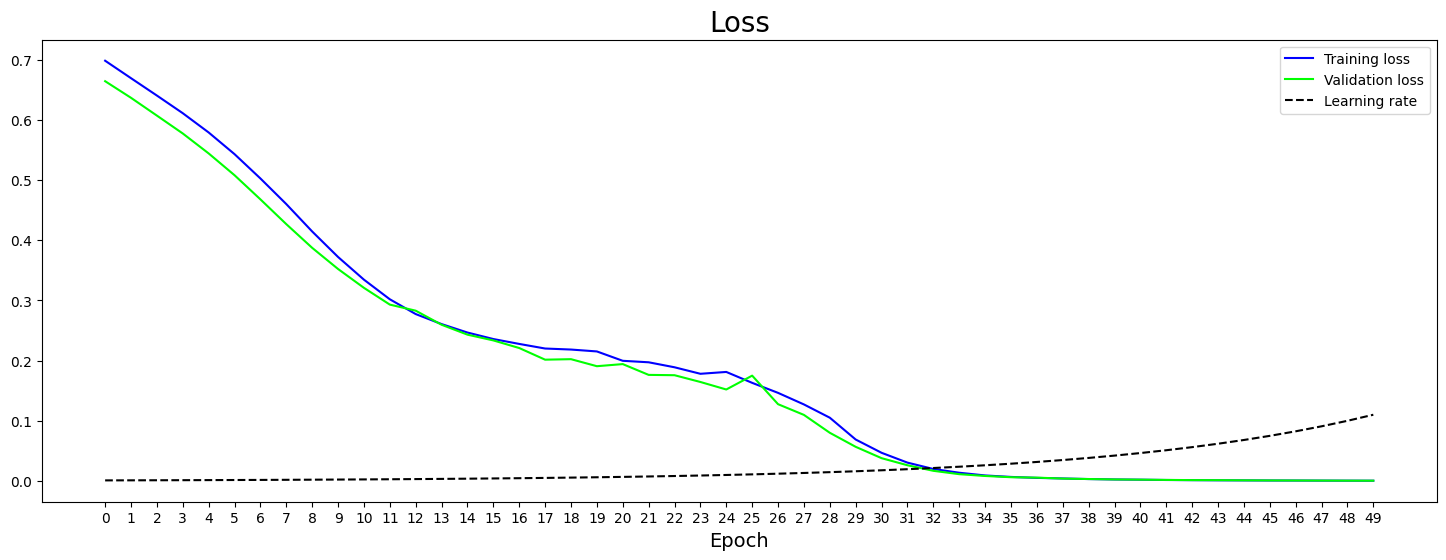

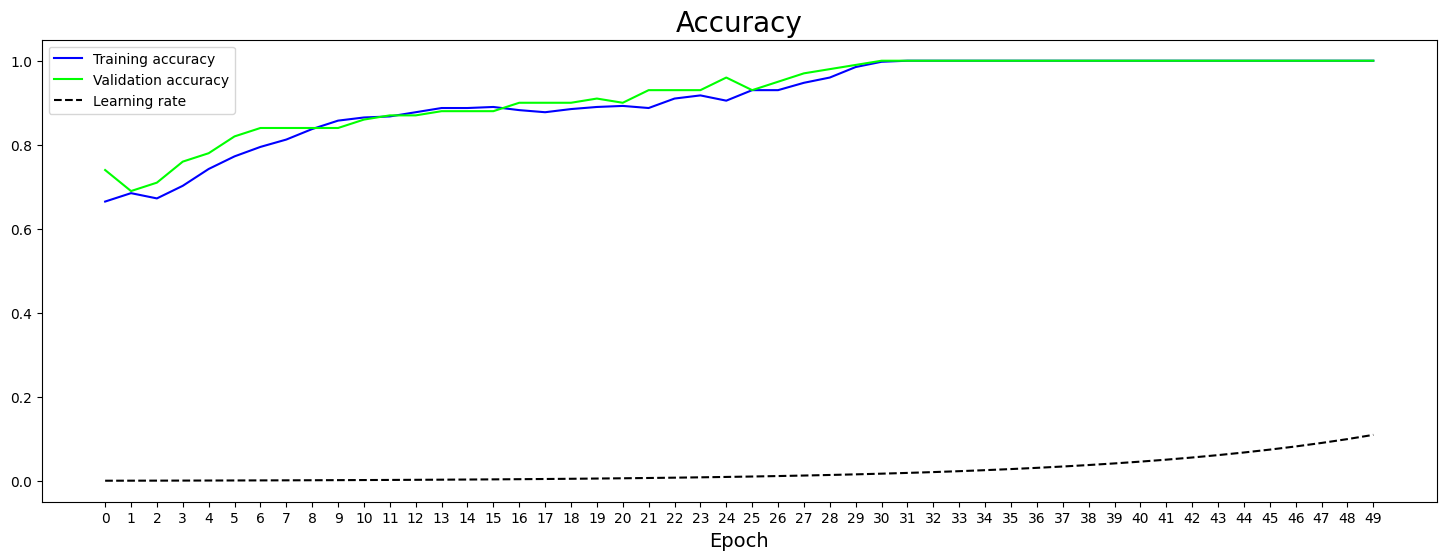

In [11]:
mlp.plot_history(history=history_2, figsize=(18, 6))

## Create model_3 using the more optimal learning rate.

In [12]:
tf.random.set_seed(42)

model_3 = tf.keras.models.clone_model(model_2)

model_3.compile(loss=binary_crossentropy,
                optimizer=Adam(learning_rate=0.0147),
                metrics=["accuracy"])

history_3 = model_3.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
13/13 [==============================] - 1s 26ms/step - loss: 0.6592 - accuracy: 0.6375 - val_loss: 0.5643 - val_accuracy: 0.7700
Epoch 2/15
13/13 [==============================] - 0s 11ms/step - loss: 0.4632 - accuracy: 0.8275 - val_loss: 0.3577 - val_accuracy: 0.8500
Epoch 3/15
13/13 [==============================] - 0s 12ms/step - loss: 0.3032 - accuracy: 0.8575 - val_loss: 0.2794 - val_accuracy: 0.8700
Epoch 4/15
13/13 [==============================] - 0s 12ms/step - loss: 0.2434 - accuracy: 0.8800 - val_loss: 0.1968 - val_accuracy: 0.9100
Epoch 5/15
13/13 [==============================] - 0s 11ms/step - loss: 0.2235 - accuracy: 0.8850 - val_loss: 0.1845 - val_accuracy: 0.9300
Epoch 6/15
13/13 [==============================] - 0s 11ms/step - loss: 0.2360 - accuracy: 0.8700 - val_loss: 0.1890 - val_accuracy: 0.9300
Epoch 7/15
13/13 [==============================] - 0s 11ms/step - loss: 0.2236 - accuracy: 0.8950 - val_loss: 0.2062 - val_accuracy: 0.9000
Epoch 8/15
13

## Plot history of model_3

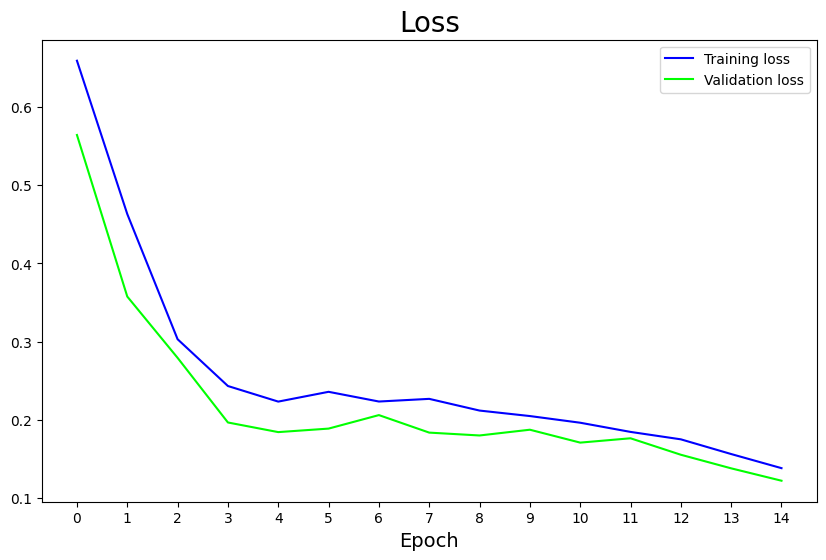

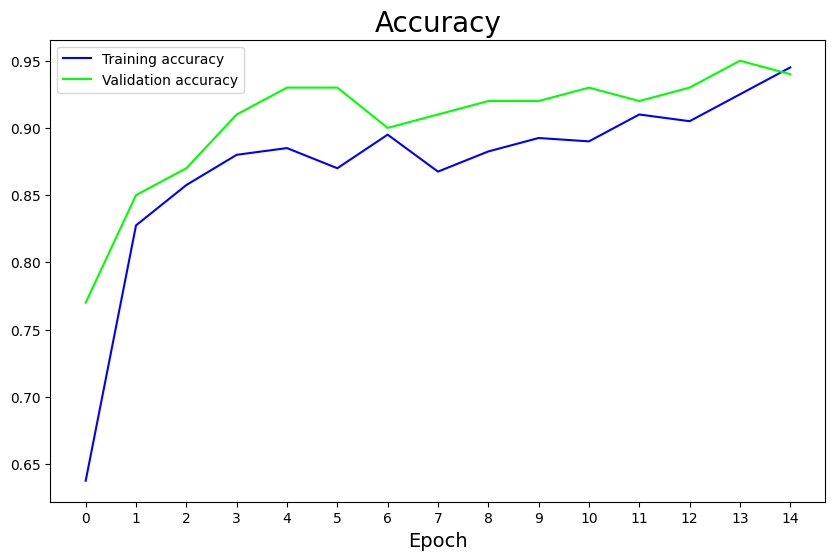

In [13]:
mlp.plot_history(history=history_3)

## Plot decission boundary for model_3

313/313 [==============================] - 1s 2ms/step
doing binary classification


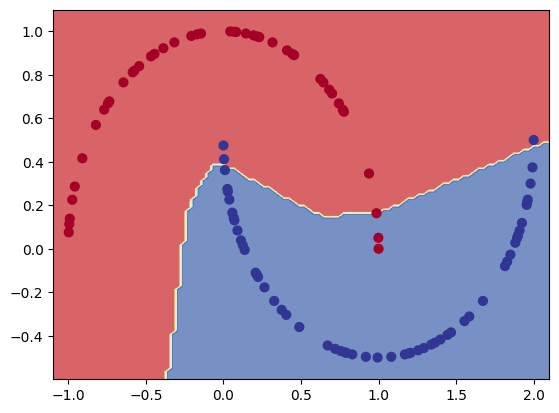

In [14]:
mlp.plot_decision_boundary(model=model_3, x=X_test, y=y_test)

# Plot confusion-matrix for model_3

4/4 [==============================] - 0s 6ms/step


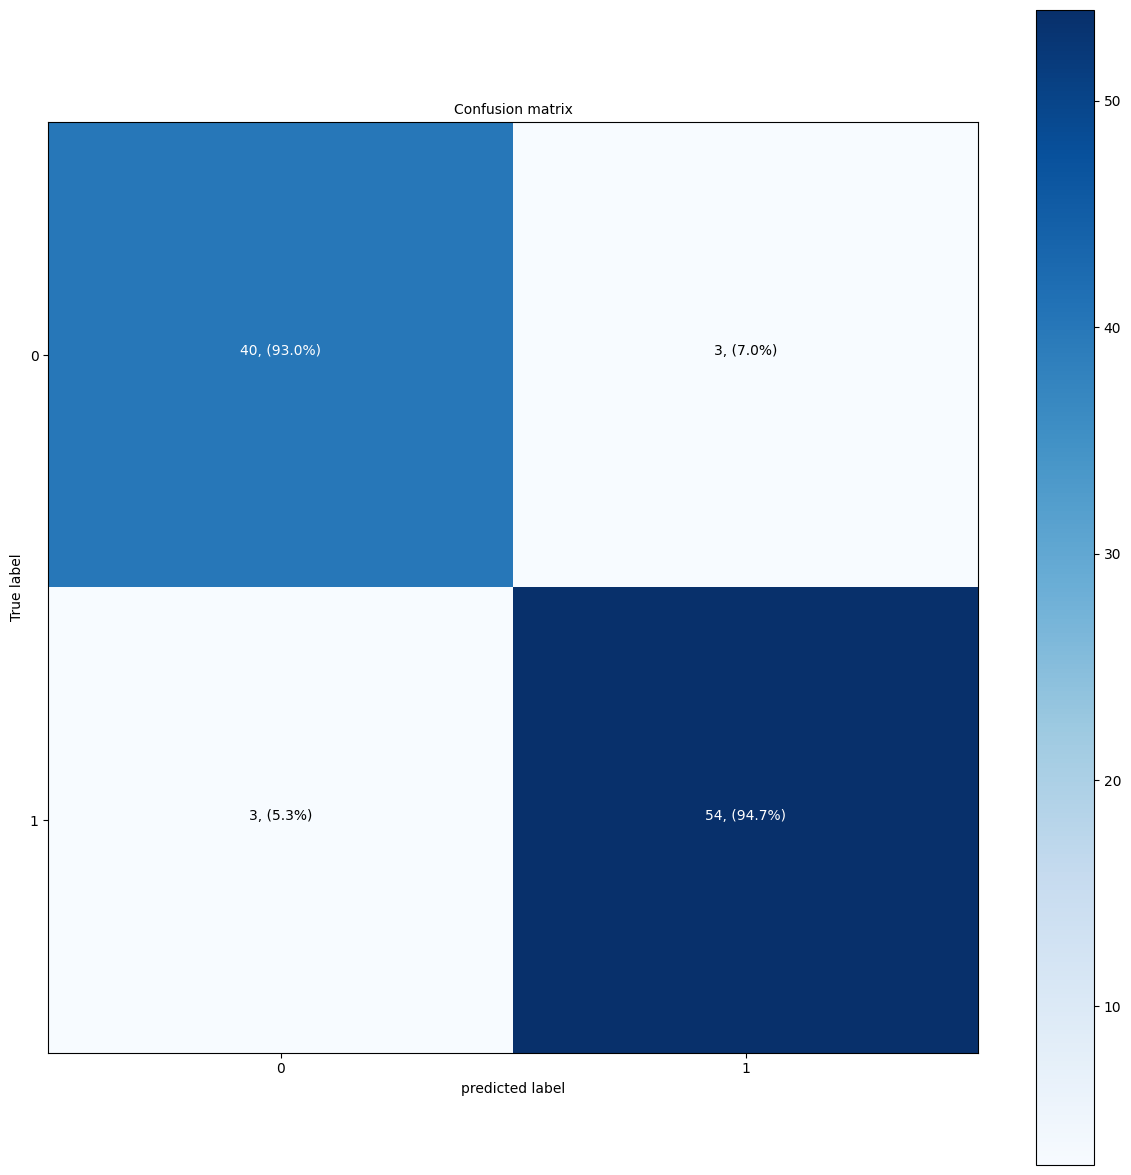

In [16]:
y_pred = model_3.predict(X_test)
mlu.plot_classification_confusion_matrix(y_test, y_pred)